In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

print("--- İLK 5 SATIR ---")
print(df.head())


--- İLK 5 SATIR ---
                                       INDICATOR  \
0  Health conditions among children under age 18   
1  Health conditions among children under age 18   
2  Health conditions among children under age 18   
3  Health conditions among children under age 18   
4  Health conditions among children under age 18   

                                         PANEL  PANEL_NUM  \
0  Current asthma among persons under 18 years          1   
1  Current asthma among persons under 18 years          1   
2            ADHD among persons under 18 years          3   
3            ADHD among persons under 18 years          3   
4            ADHD among persons under 18 years          3   

                         UNIT  UNIT_NUM STUB_NAME  STUB_NAME_NUM  \
0  Percent of children, crude         1     Total              0   
1  Percent of children, crude         1     Total              0   
2  Percent of children, crude         1       Age              1   
3  Percent of children, crud

In [52]:
print("\n--- VERİ BİLGİSİ (Info) ---")
print(df.info())


--- VERİ BİLGİSİ (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       2744 non-null   object 
 1   PANEL           2744 non-null   object 
 2   PANEL_NUM       2744 non-null   int64  
 3   UNIT            2744 non-null   object 
 4   UNIT_NUM        2744 non-null   int64  
 5   STUB_NAME       2744 non-null   object 
 6   STUB_NAME_NUM   2744 non-null   int64  
 7   STUB_LABEL      2744 non-null   object 
 8   STUB_LABEL_NUM  2744 non-null   float64
 9   YEAR            2744 non-null   object 
 10  YEAR_NUM        2744 non-null   int64  
 11  AGE             2744 non-null   object 
 12  AGE_NUM         2744 non-null   float64
 13  ESTIMATE        2516 non-null   float64
 14  SE              2516 non-null   float64
 15  FLAG            287 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 

In [53]:
print("\n--- İSTATİSTİKSEL ÖZET (Describe) ---")
print(df.describe().T)


--- İSTATİSTİKSEL ÖZET (Describe) ---
                 count      mean       std  min  25%  50%     75%   max
PANEL_NUM       2744.0  4.520408  2.309363  1.0  2.0  5.0   7.000   8.0
UNIT_NUM        2744.0  1.000000  0.000000  1.0  1.0  1.0   1.000   1.0
STUB_NAME_NUM   2744.0  3.500000  1.733839  0.0  2.0  3.0   5.000   6.0
STUB_LABEL_NUM  2744.0  3.718980  1.737358  0.0  2.2  3.6   5.200   6.2
YEAR_NUM        2744.0  7.500000  4.031864  1.0  4.0  7.5  11.000  14.0
AGE_NUM         2744.0  0.268805  0.679294  0.0  0.0  0.0   0.000   2.2
ESTIMATE        2516.0  8.480008  4.287880  1.1  5.2  7.1  11.225  21.7
SE              2516.0  0.441852  0.364903  0.1  0.2  0.3   0.500   3.0


In [54]:
df = pd.read_csv('data/pediatric.csv')
df_clean = df.dropna(subset=['ESTIMATE']).copy()

cols_to_drop = ['UNIT', 'UNIT_NUM', 'FLAG', 'SE', 'INDICATOR']
df_model = df_clean.drop(columns=cols_to_drop)

print(f"Orijinal veri boyutu: {df.shape}")
print(f"Temizlenmiş veri boyutu: {df_model.shape}")

Orijinal veri boyutu: (2744, 16)
Temizlenmiş veri boyutu: (2516, 11)


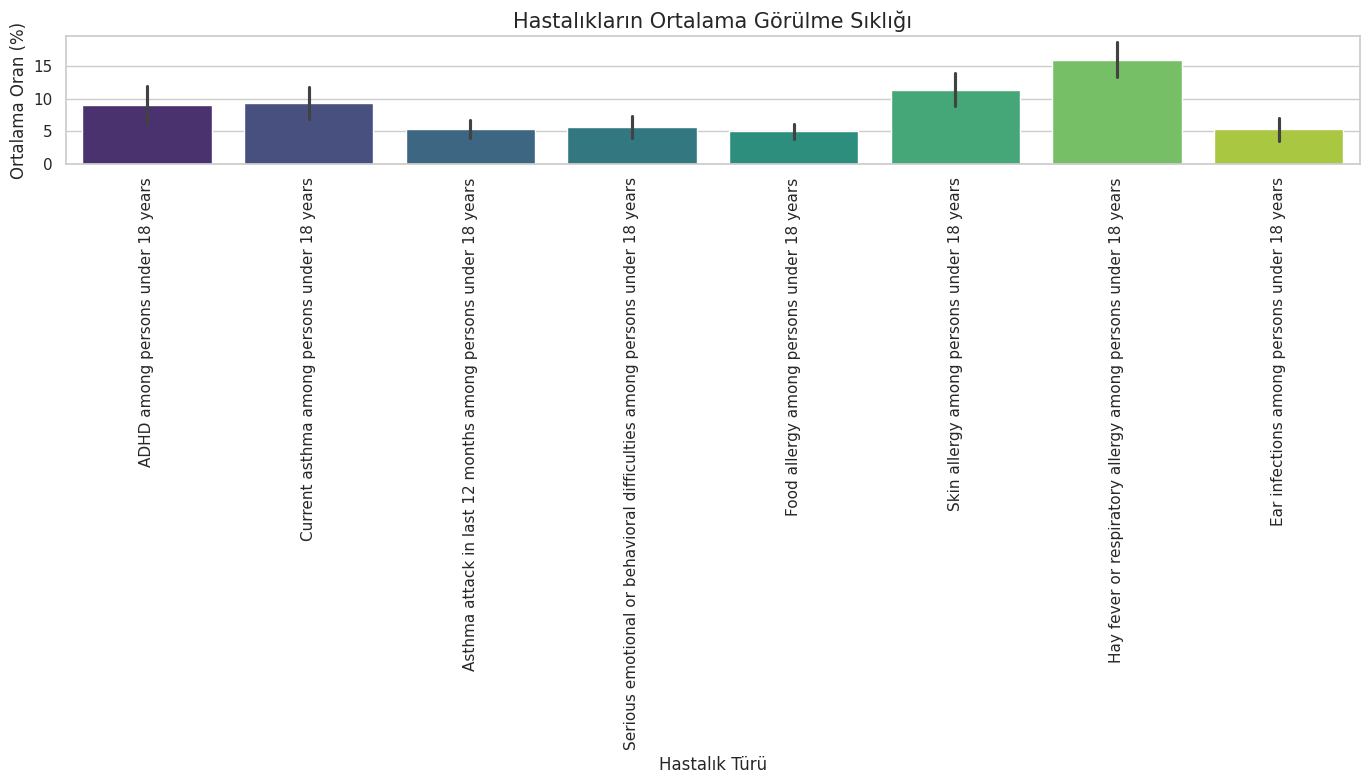

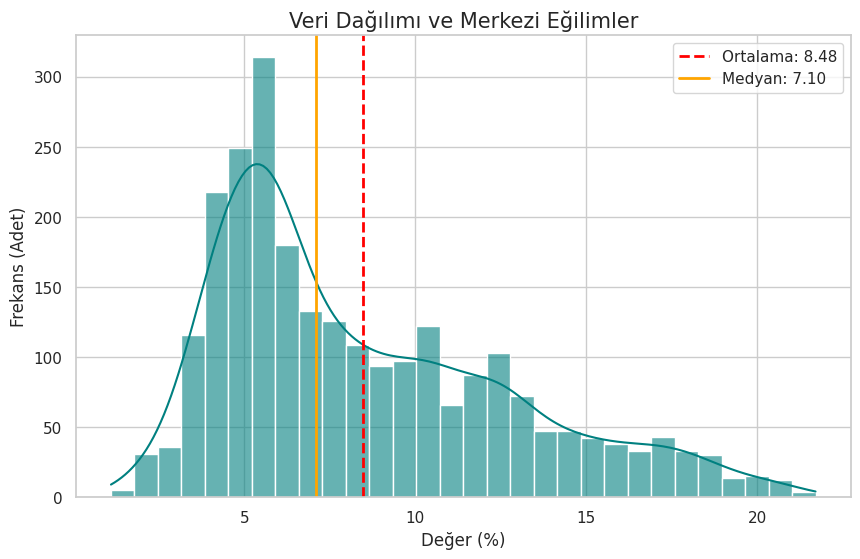

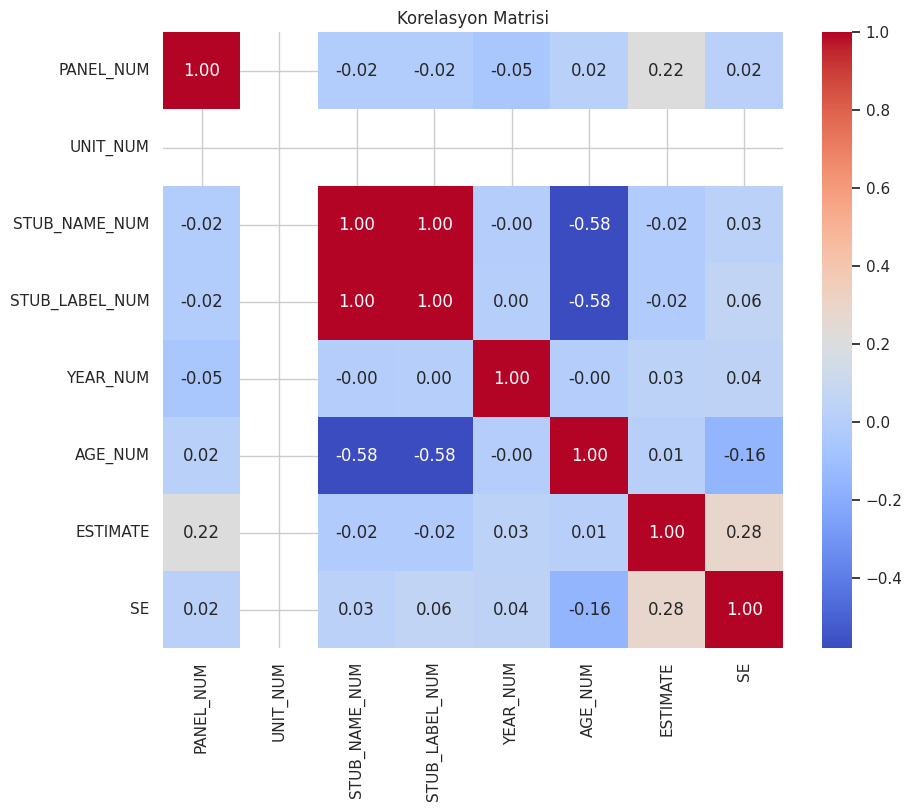

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='PANEL', y='ESTIMATE', data=df_clean, palette="viridis", errorbar='sd')

plt.xticks(rotation=90)
plt.title('Hastalıkların Ortalama Görülme Sıklığı', fontsize=15)
plt.ylabel('Ortalama Oran (%)', fontsize=12)
plt.xlabel('Hastalık Türü', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df_clean['ESTIMATE'], kde=True, bins=30, color='teal', alpha=0.6)

mean_val = df_clean['ESTIMATE'].mean()
median_val = df_clean['ESTIMATE'].median()


plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Ortalama: {mean_val:.2f}')
plt.axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Medyan: {median_val:.2f}')

plt.title('Veri Dağılımı ve Merkezi Eğilimler', fontsize=15)
plt.xlabel('Değer (%)', fontsize=12)
plt.ylabel('Frekans (Adet)', fontsize=12)
plt.legend()
plt.show()

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
corr = df_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [56]:
features = ['PANEL', 'STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE']
target = 'ESTIMATE'

X = df_model[features]
y = df_model[target]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Eğitim Seti: {X_train.shape}, Test Seti: {X_test.shape}")

Eğitim Seti: (2012, 54), Test Seti: (504, 54)


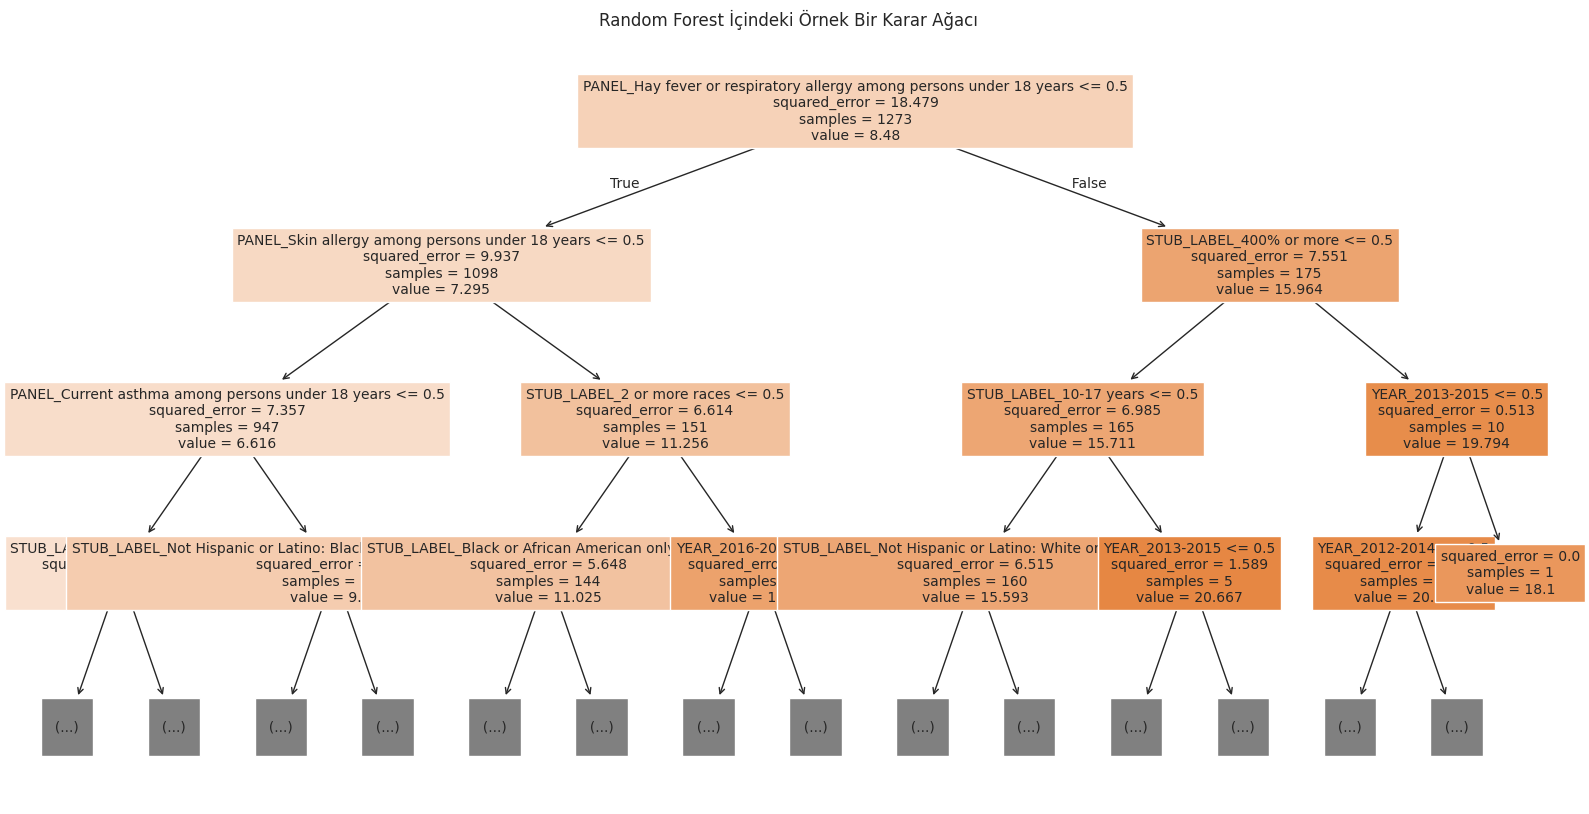

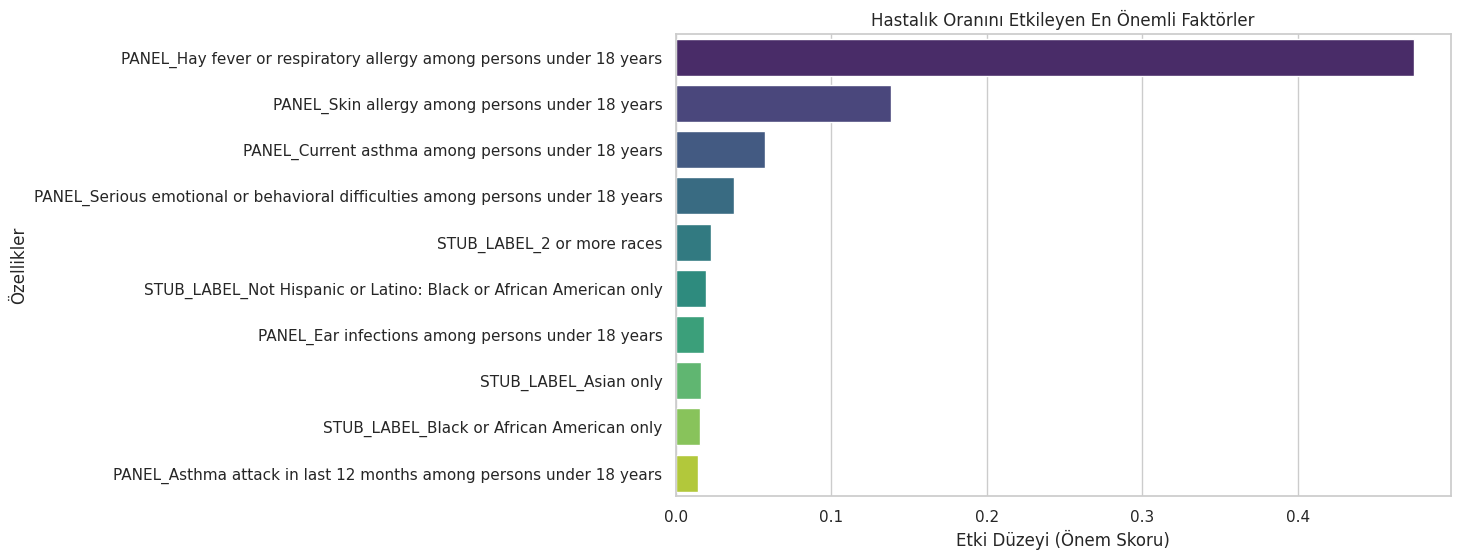

In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0],
          feature_names=X_encoded.columns,
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title("Random Forest İçindeki Örnek Bir Karar Ağacı")
plt.show()

importances = model.feature_importances_
feature_names = X_encoded.columns


feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10) # En önemli 10 tanesi

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Hastalık Oranını Etkileyen En Önemli Faktörler')
plt.xlabel('Etki Düzeyi (Önem Skoru)')
plt.ylabel('Özellikler')
plt.show()

------------------------------
MSE (Hata Kareleri Ortalaması): 1.3094
R2 Score (Başarı Oranı): %93.03
------------------------------


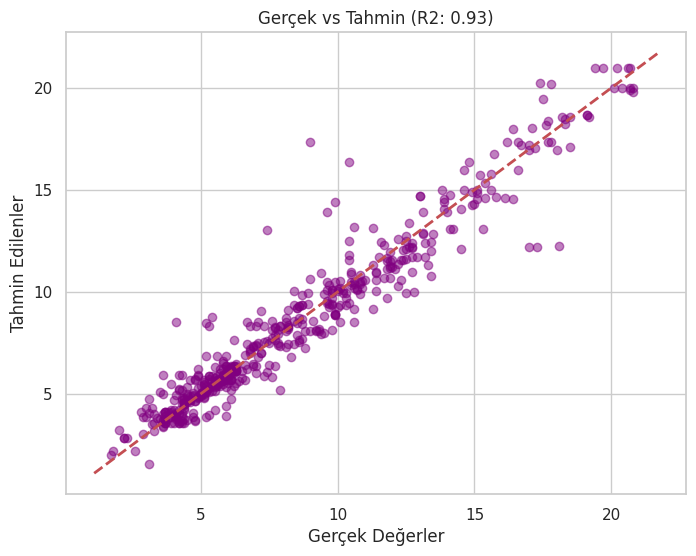

In [58]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print(f"MSE (Hata Kareleri Ortalaması): {mse:.4f}")
print(f"R2 Score (Başarı Oranı): %{r2*100:.2f}")
print("-" * 30)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilenler')
plt.title(f'Gerçek vs Tahmin (R2: {r2:.2f})')
plt.show()